In [1]:
import torch
import pickle
import evaluate
with open("//home/od/Desktop/repos/dfd-clip/logs/deepfake/deepfake/c23+resi+dbal+3e-3+4s20f+reg_vien(hf,s,pfa-s)+last6+SGD(0.9m)/stats_0521T0951_best_video.pickle", "rb") as f:
    x = pickle.load(f)
x.keys()

/home/od/anaconda3/envs/dfd-clip/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


dict_keys(['FFPP', 'DFDC', 'CDF'])

In [2]:
acc = evaluate.load("accuracy")
roc = evaluate.load("roc_auc")

In [3]:
for k in x.keys():
    print(k)
    print(acc.compute(predictions=[
          1 if i > 0.5 else 0 for i in x[k]["prob"]], references=x[k]["label"]))
    print(roc.compute(prediction_scores=x[k]
          ["prob"], references=x[k]["label"]))

FFPP
{'accuracy': 0.575}
{'roc_auc': 0.7128061224489797}
DFDC
{'accuracy': 0.6801872074882995}
{'roc_auc': 0.7894719568657328}
CDF
{'accuracy': 0.62109375}
{'roc_auc': 0.9000439664502164}


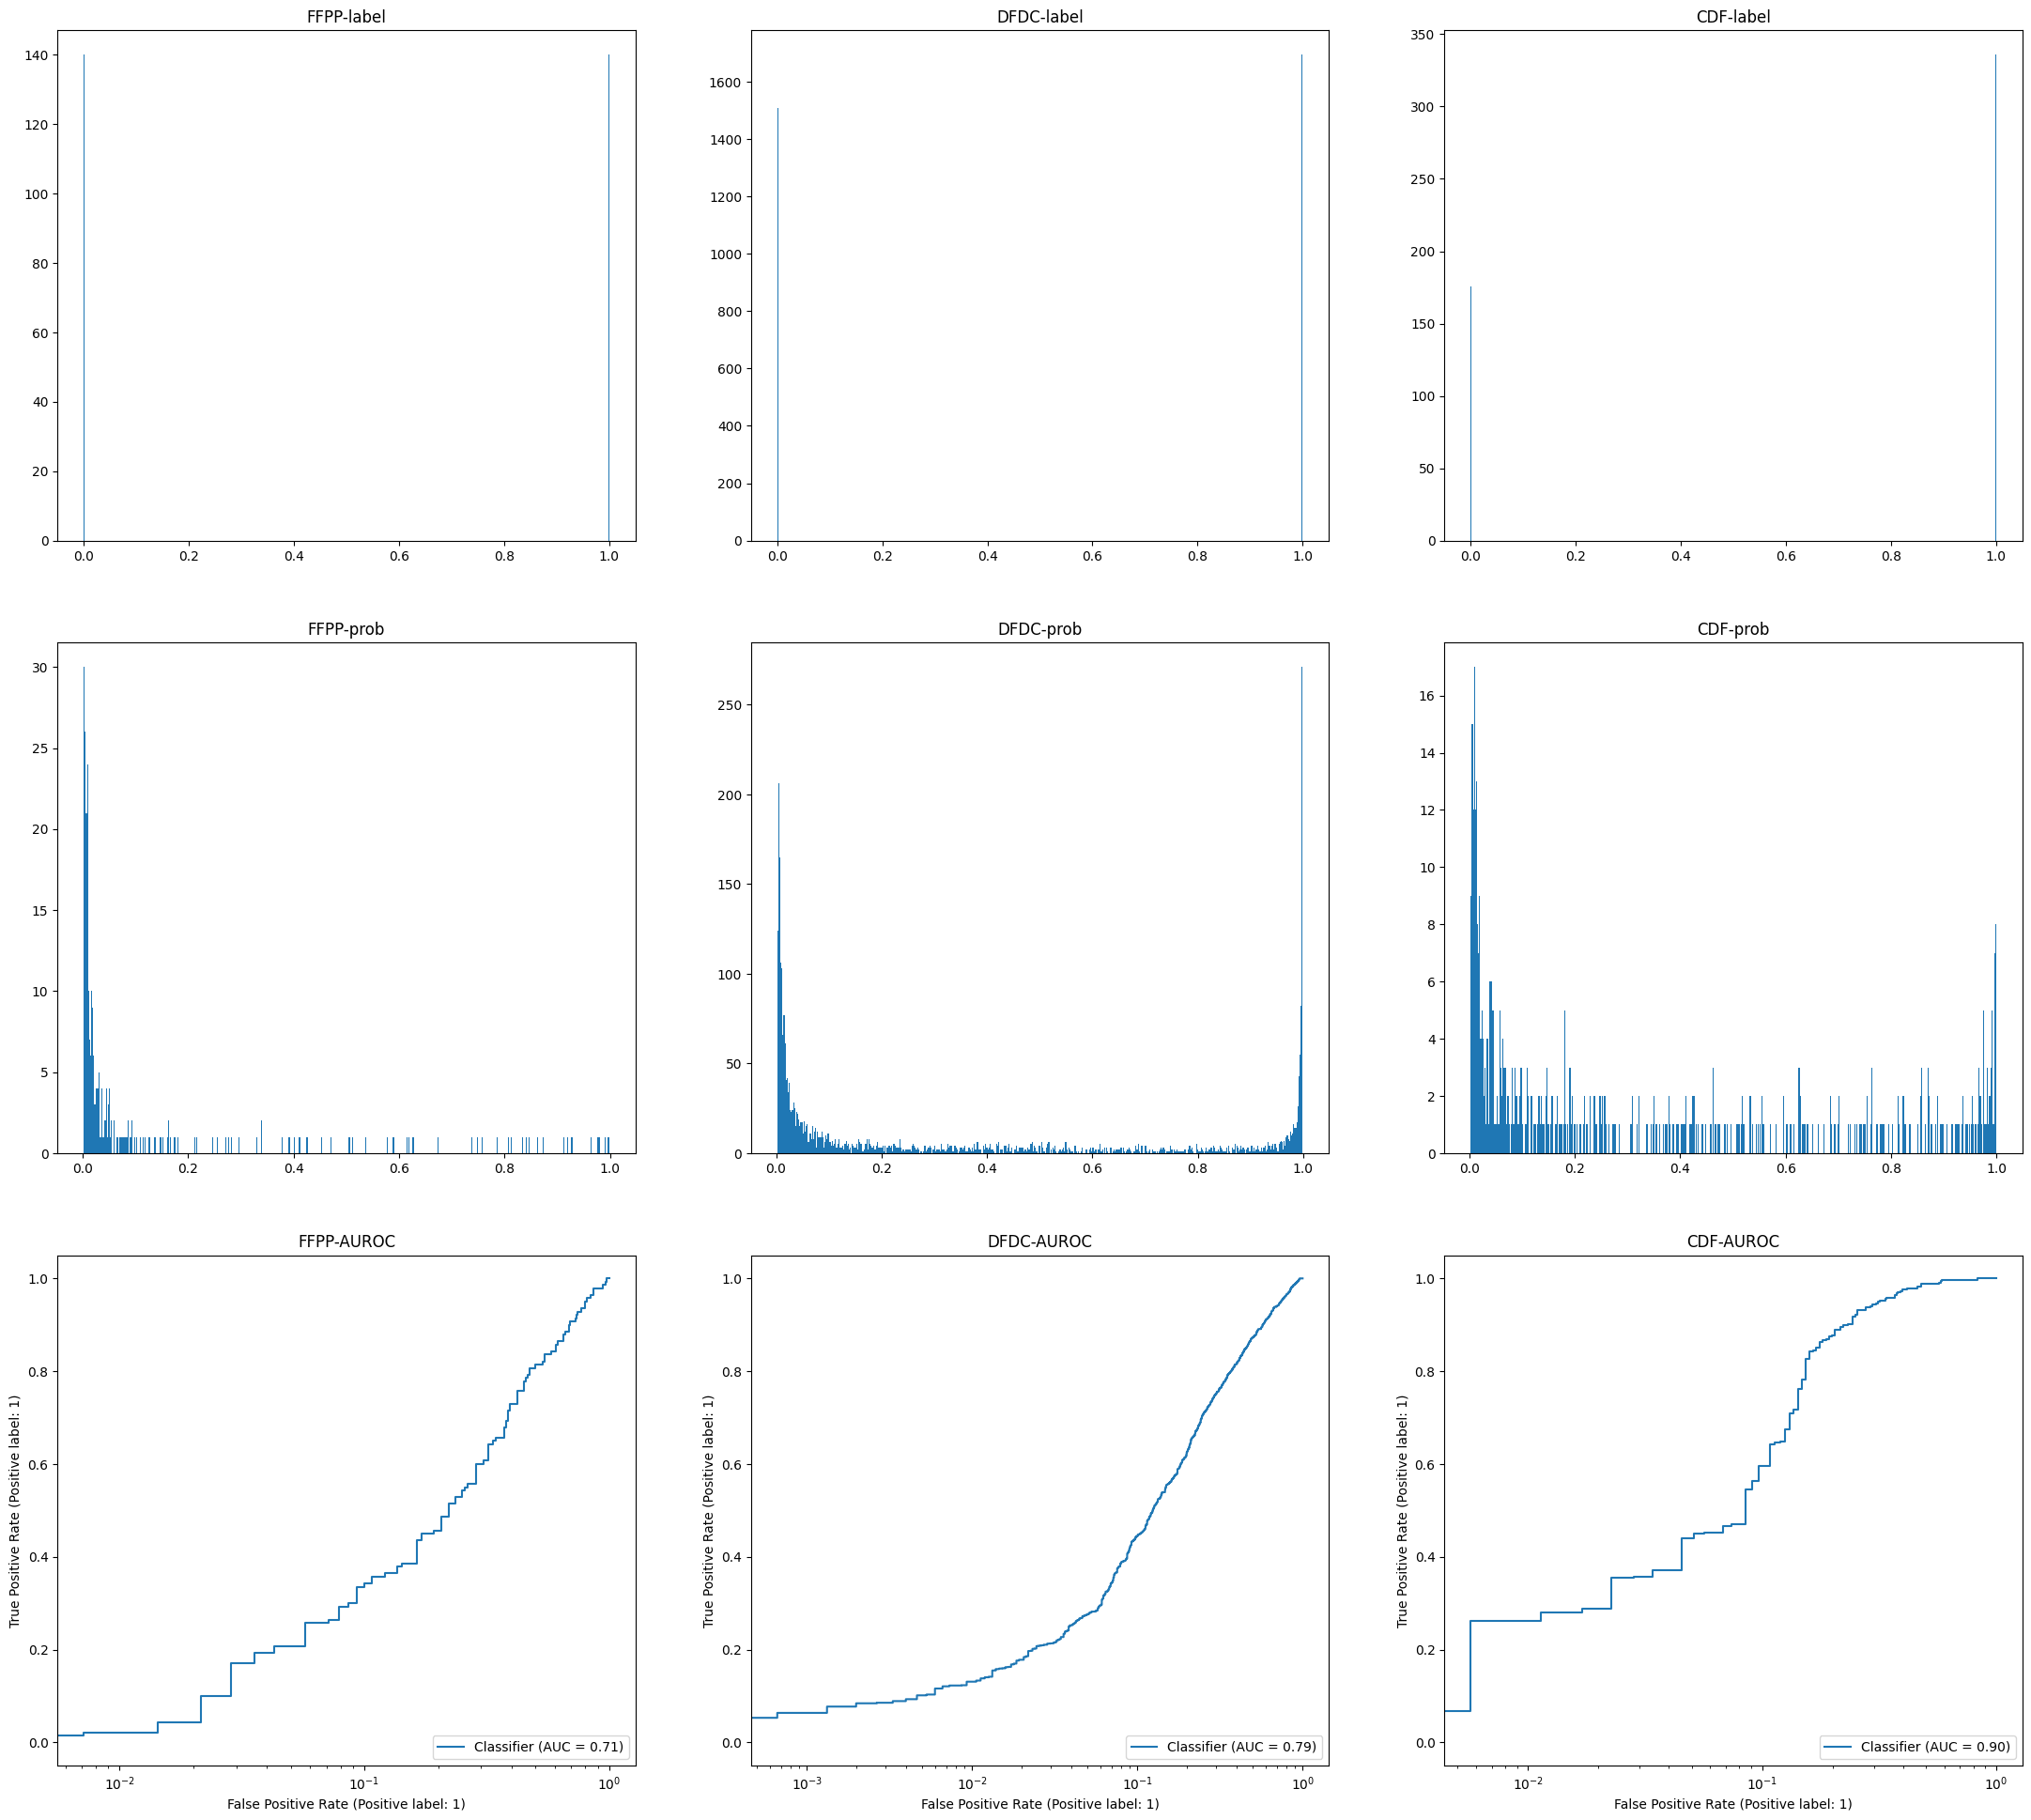

In [4]:
from matplotlib import pyplot as plt
from sklearn import metrics
ds_names = list(x.keys())
m_names = list(x[ds_names[0]].keys())
plt.figure(figsize=(9 * len(ds_names), 8 * (len(m_names) + 1)))
for i, k in enumerate(ds_names):
    # plot stats
    for j, m in enumerate(m_names):
        plt.subplot(len(m_names) + 1, len(ds_names), 1 + len(ds_names) * j + i)
        # plt.gca().set_xscale("log")
        plt.hist(x[k][m], bins=500)
        plt.title(f"{k}-{m}")
    # plot auroc
    plt.subplot(len(m_names) + 1, len(ds_names),
                1 + len(ds_names) * len(m_names) + i)
    plt.gca().set_xscale("log")
    metrics.RocCurveDisplay.from_predictions(
        y_true=x[k]["label"], y_pred=x[k]["prob"], ax=plt.gca())
    plt.title(f"{k}-AUROC")
plt.show()